In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, neural_network, model_selection, metrics, ensemble, kernel_approximation
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
%matplotlib inline

In [2]:
l2clip = 5
clip = np.power(2,l2clip)
l2clip_birange = 2*l2clip+1

l2_arr_lb = np.arange(-l2clip,l2clip)
l2_arr_ub = l2_arr_lb + 1
clip_pow2_ub_lb = np.array([np.sign(l2_arr_lb)*np.power(2.0,np.abs(l2_arr_lb)), np.sign(l2_arr_ub)*np.power(2.0,np.abs(l2_arr_ub))]).T
clip_pow2_ub_lb = np.insert(clip_pow2_ub_lb, l2clip, [-1,1],axis=0)
clip_pow2_ub_lb[l2clip-1,1] = -1
clip_pow2_ub_lb[l2clip+1,0] = 1

In [3]:
feature_names = ['cm', 'cs', 'cx', 'fBB', 'fBK', 'fBN', 'fBP', 'fBQ', 'fBR', 'fBk', 'fBn', 'fBp', 'fBq', 'fBr', 'fKB', 'fKK', 'fKN', 'fKP', 'fKQ', 'fKR', 'fKb', 'fKn', 'fKp', 'fKq', 'fKr', 'fNB', 'fNK', 'fNN', 'fNP', 'fNQ', 'fNR', 'fNb', 'fNk', 'fNp', 'fNq', 'fNr', 'fPB', 'fPK', 'fPN', 'fPP', 'fPQ', 'fPR', 'fPb', 'fPk', 'fPn', 'fPq', 'fPr', 'fQB', 'fQK', 'fQN', 'fQP', 'fQQ', 'fQR', 'fQb', 'fQk', 'fQn', 'fQp', 'fQr', 'fRB', 'fRK', 'fRN', 'fRP', 'fRQ', 'fRR', 'fRb', 'fRk', 'fRn', 'fRp', 'fRq', 'kOO', 'kOOO', 'kOO_OOO', 'nfB', 'nfK', 'nfN', 'nfP', 'nfQ', 'nfR', 'nmB', 'nmK', 'nmN', 'nmP', 'nmQ', 'nmR', 'nrB', 'nrK', 'nrN', 'nrP', 'nrQ', 'nrR', 'nsB', 'nsK', 'nsN', 'nsP', 'nsQ', 'nsR', 'nvB', 'nvN', 'nvP', 'nvQ', 'nvR', 'nxB', 'nxK', 'nxN', 'nxP', 'nxQ', 'nxR', 'sA1B', 'sA1K', 'sA1N', 'sA1Q', 'sA1R', 'sA2B', 'sA2K', 'sA2N', 'sA2P', 'sA2Q', 'sA2R', 'sA3B', 'sA3K', 'sA3N', 'sA3P', 'sA3Q', 'sA3R', 'sA4B', 'sA4K', 'sA4N', 'sA4P', 'sA4Q', 'sA4R', 'sA5B', 'sA5K', 'sA5N', 'sA5P', 'sA5Q', 'sA5R', 'sA6B', 'sA6K', 'sA6N', 'sA6P', 'sA6Q', 'sA6R', 'sA7B', 'sA7K', 'sA7N', 'sA7P', 'sA7Q', 'sA7R', 'sA8B', 'sA8K', 'sA8N', 'sA8Q', 'sA8R', 'sB1B', 'sB1K', 'sB1N', 'sB1Q', 'sB1R', 'sB2B', 'sB2K', 'sB2N', 'sB2P', 'sB2Q', 'sB2R', 'sB3B', 'sB3K', 'sB3N', 'sB3P', 'sB3Q', 'sB3R', 'sB4B', 'sB4K', 'sB4N', 'sB4P', 'sB4Q', 'sB4R', 'sB5B', 'sB5K', 'sB5N', 'sB5P', 'sB5Q', 'sB5R', 'sB6B', 'sB6K', 'sB6N', 'sB6P', 'sB6Q', 'sB6R', 'sB7B', 'sB7K', 'sB7N', 'sB7P', 'sB7Q', 'sB7R', 'sB8B', 'sB8K', 'sB8N', 'sB8Q', 'sB8R', 'sC1B', 'sC1K', 'sC1N', 'sC1Q', 'sC1R', 'sC2B', 'sC2K', 'sC2N', 'sC2P', 'sC2Q', 'sC2R', 'sC3B', 'sC3K', 'sC3N', 'sC3P', 'sC3Q', 'sC3R', 'sC4B', 'sC4K', 'sC4N', 'sC4P', 'sC4Q', 'sC4R', 'sC5B', 'sC5K', 'sC5N', 'sC5P', 'sC5Q', 'sC5R', 'sC6B', 'sC6K', 'sC6N', 'sC6P', 'sC6Q', 'sC6R', 'sC7B', 'sC7K', 'sC7N', 'sC7P', 'sC7Q', 'sC7R', 'sC8B', 'sC8K', 'sC8N', 'sC8Q', 'sC8R', 'sD1B', 'sD1K', 'sD1N', 'sD1Q', 'sD1R', 'sD2B', 'sD2K', 'sD2N', 'sD2P', 'sD2Q', 'sD2R', 'sD3B', 'sD3K', 'sD3N', 'sD3P', 'sD3Q', 'sD3R', 'sD4B', 'sD4K', 'sD4N', 'sD4P', 'sD4Q', 'sD4R', 'sD5B', 'sD5K', 'sD5N', 'sD5P', 'sD5Q', 'sD5R', 'sD6B', 'sD6K', 'sD6N', 'sD6P', 'sD6Q', 'sD6R', 'sD7B', 'sD7K', 'sD7N', 'sD7P', 'sD7Q', 'sD7R', 'sD8B', 'sD8K', 'sD8N', 'sD8Q', 'sD8R', 'sE1B', 'sE1K', 'sE1N', 'sE1Q', 'sE1R', 'sE2B', 'sE2K', 'sE2N', 'sE2P', 'sE2Q', 'sE2R', 'sE3B', 'sE3K', 'sE3N', 'sE3P', 'sE3Q', 'sE3R', 'sE4B', 'sE4K', 'sE4N', 'sE4P', 'sE4Q', 'sE4R', 'sE5B', 'sE5K', 'sE5N', 'sE5P', 'sE5Q', 'sE5R', 'sE6B', 'sE6K', 'sE6N', 'sE6P', 'sE6Q', 'sE6R', 'sE7B', 'sE7K', 'sE7N', 'sE7P', 'sE7Q', 'sE7R', 'sE8B', 'sE8K', 'sE8N', 'sE8Q', 'sE8R', 'sF1B', 'sF1K', 'sF1N', 'sF1Q', 'sF1R', 'sF2B', 'sF2K', 'sF2N', 'sF2P', 'sF2Q', 'sF2R', 'sF3B', 'sF3K', 'sF3N', 'sF3P', 'sF3Q', 'sF3R', 'sF4B', 'sF4K', 'sF4N', 'sF4P', 'sF4Q', 'sF4R', 'sF5B', 'sF5K', 'sF5N', 'sF5P', 'sF5Q', 'sF5R', 'sF6B', 'sF6K', 'sF6N', 'sF6P', 'sF6Q', 'sF6R', 'sF7B', 'sF7K', 'sF7N', 'sF7P', 'sF7Q', 'sF7R', 'sF8B', 'sF8K', 'sF8N', 'sF8Q', 'sF8R', 'sG1B', 'sG1K', 'sG1N', 'sG1Q', 'sG1R', 'sG2B', 'sG2K', 'sG2N', 'sG2P', 'sG2Q', 'sG2R', 'sG3B', 'sG3K', 'sG3N', 'sG3P', 'sG3Q', 'sG3R', 'sG4B', 'sG4K', 'sG4N', 'sG4P', 'sG4Q', 'sG4R', 'sG5B', 'sG5K', 'sG5N', 'sG5P', 'sG5Q', 'sG5R', 'sG6B', 'sG6K', 'sG6N', 'sG6P', 'sG6Q', 'sG6R', 'sG7B', 'sG7K', 'sG7N', 'sG7P', 'sG7Q', 'sG7R', 'sG8B', 'sG8K', 'sG8N', 'sG8Q', 'sG8R', 'sH1B', 'sH1K', 'sH1N', 'sH1Q', 'sH1R', 'sH2B', 'sH2K', 'sH2N', 'sH2P', 'sH2Q', 'sH2R', 'sH3B', 'sH3K', 'sH3N', 'sH3P', 'sH3Q', 'sH3R', 'sH4B', 'sH4K', 'sH4N', 'sH4P', 'sH4Q', 'sH4R', 'sH5B', 'sH5K', 'sH5N', 'sH5P', 'sH5Q', 'sH5R', 'sH6B', 'sH6K', 'sH6N', 'sH6P', 'sH6Q', 'sH6R', 'sH7B', 'sH7K', 'sH7N', 'sH7P', 'sH7Q', 'sH7R', 'sH8B', 'sH8K', 'sH8N', 'sH8Q', 'sH8R', 'xBK', 'xBN', 'xBP', 'xBQ', 'xBR', 'xBk', 'xBn', 'xBp', 'xBq', 'xBr', 'xKB', 'xKN', 'xKP', 'xKQ', 'xKR', 'xKb', 'xKn', 'xKp', 'xKq', 'xKr', 'xNB', 'xNK', 'xNN', 'xNP', 'xNQ', 'xNR', 'xNb', 'xNk', 'xNn', 'xNp', 'xNq', 'xNr', 'xPB', 'xPK', 'xPN', 'xPP', 'xPQ', 'xPR', 'xPb', 'xPk', 'xPn', 'xPp', 'xPq', 'xPr', 'xQB', 'xQK', 'xQN', 'xQP', 'xQQ', 'xQR', 'xQb', 'xQk', 'xQn', 'xQp', 'xQq', 'xQr', 'xRB', 'xRK', 'xRN', 'xRP', 'xRQ', 'xRR', 'xRb', 'xRk', 'xRn', 'xRp', 'xRq', 'xRr']

In [5]:
def load_data():
    board_df = pd.read_pickle("../data/test/board.pkl")
    move_df = pd.read_pickle("../data/test/move.pkl")
    move_df.set_index(['id','mid'],inplace=True)
    move_df.sort_index(inplace=True)

    print('loaded data')
    features_df = pd.read_pickle("../data/test/features.pkl",compression='gzip')[feature_names]
    features_df.sort_index(inplace=True)
    features_df.fillna(0.0,inplace=True)
    print('loaded features')

    label_df = move_df.join(features_df,how='right')[['score','mate_in']].copy()
    score = label_df['score'].clip(-clip,clip).fillna(0.0).values
    label_df['score'] = score
    label_df['score_log2'] = np.sign(score)*np.log2(np.maximum(np.abs(score),1))
    print('loaded labels')

    x_data, y_data = prepare_data(features_df, label_df)
    print('prepared data')

    return x_data, y_data, features_df, label_df


def prepare_data(features_df, label_df):
    x_data = features_df.values
    y_data = label_df.clip(-clip,clip).fillna(0.0).values

    return x_data, y_data

In [ ]:
x_data, y_data, features_df, label_df = load_data()
features_mean, features_std = features_df.mean(), features_df.std()

# rbf_sampler = kernel_approximation.RBFSampler(gamma=1.0, n_components=1000)
# X = rbf_sampler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)

In [ ]:
# tuned_parameters = [{ 'C': [1, 2, 5, 10], 'epsilon':[0.1,0.2,0.3]}]
# reg = model_selection.GridSearchCV(svm.LinearSVR(), tuned_parameters, cv=2, scoring='r2', n_jobs=12)
#reg = svm.LinearSVR(C=20,epsilon=10)#

# tuned_parameters = [{ 'alpha': [1]}] #0.1, 1, 2, 5, 10
# reg = model_selection.GridSearchCV(linear_model.Ridge(), tuned_parameters, verbose = 1, cv=2, scoring='neg_mean_squared_error', n_jobs=4)
#reg = linear_model.Ridge(alpha = 1)
reg = neural_network.MLPRegressor(hidden_layer_sizes=(128,64,32), verbose=True, activation='relu', learning_rate='adaptive')
#reg = ensemble.RandomForestRegressor()
#reg = svm.SVR(kernel='rbf')
#reg = svm.LinearSVR(C=20.0,epsilon=0.3, verbose=5)
print(reg.fit(x_train, y_train[:,0]))
print(reg.score(x_test,y_test[:,0]))

In [11]:
np.sqrt(np.mean(np.square(y_pred_train - y_train[:,0])))

3.6472537597418455

In [12]:
np.sqrt(np.mean(np.square(y_pred_test - y_test[:,0])))

6.20732614396622

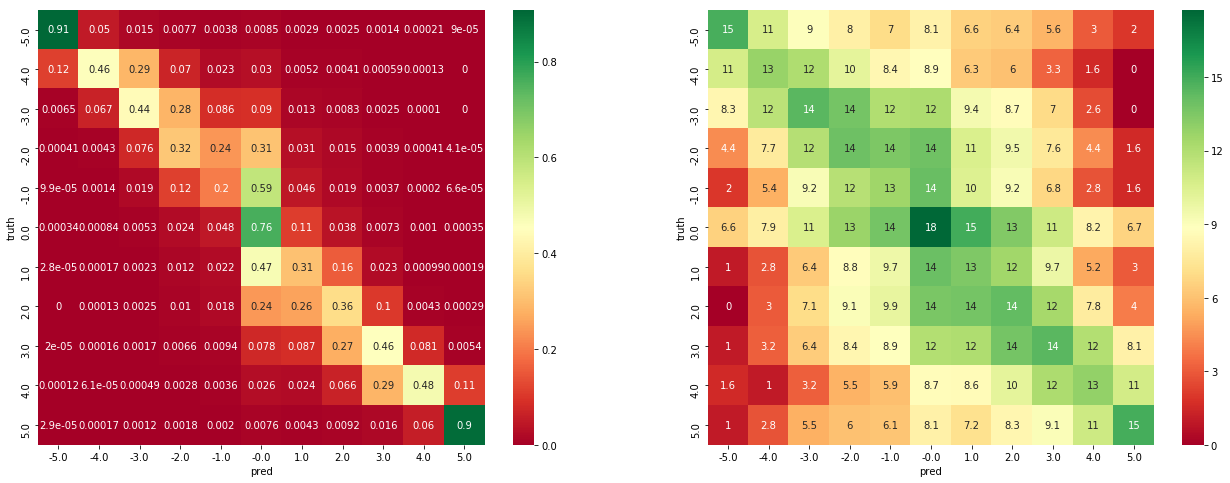

In [8]:
y_pred_train = reg.predict(x_train)
predl2 = np.clip(np.round(np.sign(y_pred_train)*np.log2(np.maximum(np.abs(y_pred_train),1))),-5,5)
yl2 = np.round(y_train[:,0])
yl2 = np.clip(np.round(np.sign(yl2)*np.log2(np.maximum(np.abs(yl2),1))),-5,5)
l2_conf_mat = pd.crosstab(yl2, predl2, rownames=['truth'],colnames=['pred'])
l2_conf_mat_norm = l2_conf_mat.T.div(l2_conf_mat.sum(axis=1).astype(np.float32)).T
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.heatmap(l2_conf_mat_norm,ax=ax[0],annot=True, cmap="RdYlGn")
sns.heatmap(np.log2(l2_conf_mat+1),ax=ax[1],annot=True, cmap="RdYlGn")

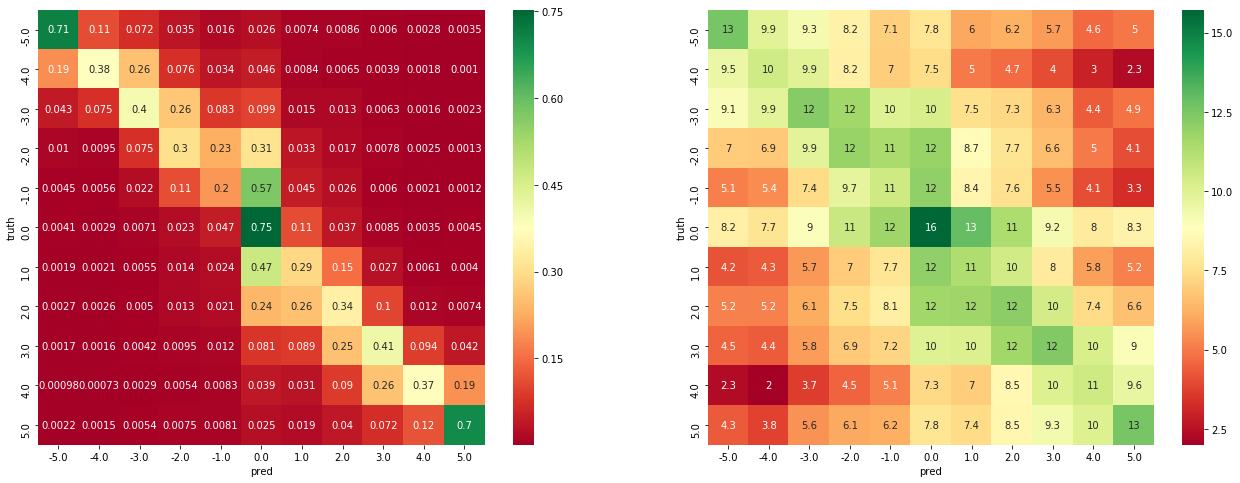

In [10]:
y_pred_test = reg.predict(x_test)
predl2 = np.clip(np.round(np.sign(y_pred_test)*np.log2(np.maximum(np.abs(y_pred_test),1))),-5,5)
yl2 = np.round(y_test[:,0])
yl2 = np.clip(np.round(np.sign(yl2)*np.log2(np.maximum(np.abs(yl2),1))),-5,5)
l2_conf_mat = pd.crosstab(yl2, predl2, rownames=['truth'],colnames=['pred'])
l2_conf_mat_norm = l2_conf_mat.T.div(l2_conf_mat.sum(axis=1).astype(np.float32)).T
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.heatmap(l2_conf_mat_norm,ax=ax[0],annot=True, cmap="RdYlGn")
sns.heatmap(np.log2(l2_conf_mat+1),ax=ax[1],annot=True, cmap="RdYlGn")

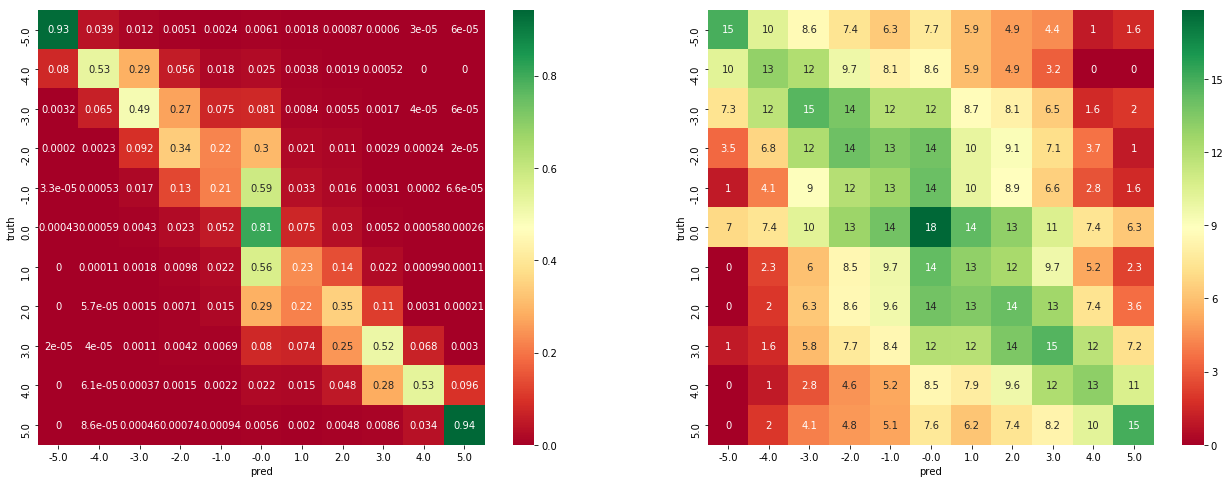

In [17]:
y_pred_train = reg.predict(x_train)
predl2 = np.clip(np.round(np.sign(y_pred_train)*np.log2(np.maximum(np.abs(y_pred_train),1))),-5,5)
yl2 = np.round(y_train[:,0])
yl2 = np.clip(np.round(np.sign(yl2)*np.log2(np.maximum(np.abs(yl2),1))),-5,5)
l2_conf_mat = pd.crosstab(yl2, predl2, rownames=['truth'],colnames=['pred'])
l2_conf_mat_norm = l2_conf_mat.T.div(l2_conf_mat.sum(axis=1).astype(np.float32)).T
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.heatmap(l2_conf_mat_norm,ax=ax[0],annot=True, cmap="RdYlGn")
sns.heatmap(np.log2(l2_conf_mat+1),ax=ax[1],annot=True, cmap="RdYlGn")

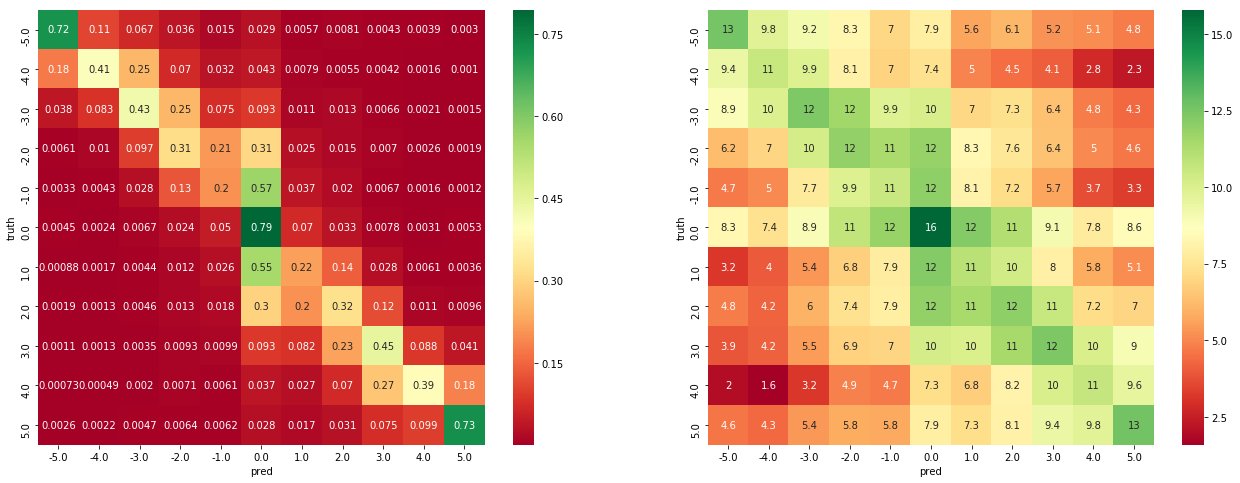

In [18]:
y_pred_test = reg.predict(x_test)
predl2 = np.clip(np.round(np.sign(y_pred_test)*np.log2(np.maximum(np.abs(y_pred_test),1))),-5,5)
yl2 = np.round(y_test[:,0])
yl2 = np.clip(np.round(np.sign(yl2)*np.log2(np.maximum(np.abs(yl2),1))),-5,5)
l2_conf_mat = pd.crosstab(yl2, predl2, rownames=['truth'],colnames=['pred'])
l2_conf_mat_norm = l2_conf_mat.T.div(l2_conf_mat.sum(axis=1).astype(np.float32)).T
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.heatmap(l2_conf_mat_norm,ax=ax[0],annot=True, cmap="RdYlGn")
sns.heatmap(np.log2(l2_conf_mat+1),ax=ax[1],annot=True, cmap="RdYlGn")

In [ ]:
glist =['n','x','f','^[^s]','c','k']
fig, axes = plt.subplots(len(glist),2, figsize=(15,30))
for index,g in enumerate(glist):
    X = features_df.filter(regex=g,axis=1).fillna(0.0).values
    
    move_fdf = move_df.join(features_df)[['score','mate_in']].copy()
    y = move_fdf.clip(32,-32).fillna(0.0).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    reg = svm.LinearSVR(C=10,epsilon=0.5)
    #reg = linear_model.Ridge(alpha = 10)
    print(g)
    print(reg.fit(X_train, y_train[:,0]))
    print('regscore: ',reg.score(X_test,y_test[:,0]))
    
    regerr = reg.predict(X_test) - y_test[:,0]
    ax = axes[index][0]
    ax.hist(regerr, bins=100, density=True, log=False, cumulative=True, fill=False,histtype='step')
    ax.twinx().hist(regerr, bins=100, density=True, log=True, cumulative=False, fill=False,histtype='bar')


    reg1 = linear_model.LogisticRegression(penalty = 'l2', class_weight='balanced')
    reg1.fit(X_train, y_train[:,1]!=0)
    print(reg1)
    print('clfscore: ',reg1.score(X_test,y_test[:,1]))
    print(metrics.confusion_matrix(y_test[:,1]!=0,reg1.predict(X_test)))
    ax = axes[index][1]
    precision,recall, thresh = metrics.precision_recall_curve(y_test[:,1]!=0,reg1.decision_function(X_test), pos_label=1)
    ax.step(recall, precision, color='b', alpha=0.2, where='post')
    print()

n


In [ ]:
regerr = reg.predict(X_test) - y_test[:,0]
fig,ax = plt.subplots()
ax.hist(regerr, bins=100, density=True, log=False, cumulative=True, fill=False,histtype='step')
ax.twinx().hist(regerr, bins=100, density=True, log=True, cumulative=False, fill=False,histtype='bar')
#sns.distplot(regerr, bins=100)
a0=1

In [ ]:
regerr = reg.predict(X_test) - y_test[:,0]
fig,ax = plt.subplots()
ax.hist(regerr, bins=100, density=True, log=False, cumulative=True, fill=False,histtype='step')
ax.twinx().hist(regerr, bins=100, density=True, log=True, cumulative=False, fill=False,histtype='bar')
#sns.distplot(regerr, bins=100)
a0=1

In [ ]:
#reg1 = svm.LinearSVC(penalty = 'l2', class_weight='balanced')
reg1 = linear_model.LogisticRegression(penalty = 'l2', class_weight='balanced')
#reg1 = svm.LinearSVR(C=10,epsilon=1)#linear_model.Ridge(alpha = 1)
reg1.fit(X_train, y_train[:,1]!=0)
print(reg1)
print(reg1.score(X_test,y_test[:,1]))
#plt.hist(reg1.predict(X_test) - y_test[:,1]!=0, bins=100,density=True, log=True)
metrics.confusion_matrix(y_test[:,1]!=0,reg1.predict(X_test))

In [ ]:
precision,recall, thresh = metrics.precision_recall_curve(y_test[:,1]!=0,reg1.decision_function(X_test), pos_label=1)
#plt.scatter(precision,recall)
plt.step(recall, precision, color='b', alpha=0.2, where='post')

In [10]:
def reg_coef_table(reg, transpose=False):
    coef = reg.coef_ if not transpose else reg.coef_.T[:,0]
    regw = pd.Series(coef, index=features_df.columns).sort_values()
    regw.name='w'

    features_freq_df = features_df.abs().sum(axis=0)
    features_freq_df.name = 'f'

    fj_df = pd.DataFrame([features_freq_df,regw]).T
    fj_df.columns = ['f','w']
    fj_df['fw'] = fj_df['f']*fj_df['w']

    return fj_df

def reg_coef_sqtable(fj_df):
    fj_dfs = fj_df.filter(regex='^[s]',axis=0).sort_values(by='f')
    fj_dfs_spl = pd.DataFrame(fj_dfs.index.map(lambda x: list(x)[1:]).values.tolist(),columns=['C','R','P'],index=fj_dfs.index).copy()
    fj_dfs_spl['C'] = fj_dfs_spl['C'].apply(lambda x: "ABCDEFGH".find(x)+1)
    fj_dfsj = fj_dfs_spl.join(fj_dfs)
    return fj_dfsj

def reg_coef_xtable(fj_df,pref='x'):
    fj_dfs = fj_df.filter(regex='^['+pref+']',axis=0).sort_values(by='f')
    fj_dfs_spl = pd.DataFrame(fj_dfs.index.map(lambda x: list(x)[1:]).values.tolist(),columns=['P1','P2'],index=fj_dfs.index).copy()
    fj_dfsj = fj_dfs_spl.join(fj_dfs)
    return fj_dfsj

In [ ]:
regw_df = reg_coef_table(reg)
regw_sq_df = reg_coef_sqtable(regw_df)
reg1w_df = reg_coef_table(reg1,True)
reg1w_sq_df = reg_coef_sqtable(reg1w_df)

In [ ]:
def piece_sq_heatmap(data, column, title,log=False):
    grpd = data.groupby('P').apply(lambda grp: pd.crosstab(grp['C'],grp['R'],grp[column],aggfunc=np.mean)).reset_index().set_index('P').groupby('P')
    ngrpd = len(grpd)    
    fig, axes = plt.subplots(ngrpd//3,3,figsize=(14,8))
    plt.suptitle(title)    
    for i, (n,grp1) in enumerate(grpd):
        ax = axes[i//3][i%3]
        mat = grp1.iloc[:,1:9].fillna(0.0).T
        mat = np.log(mat+1) if log else mat
        sns.heatmap(mat, 
                    ax=ax, cmap="seismic", cbar=False, linewidths=0.5, xticklabels="A B C D E F G H".split(' '), yticklabels=list(range(1,9)),annot=True,square=True)
        ax.set_title('piece: '+n)
        ax.set_xlabel('')

In [ ]:
#fj_dfsj.loc[:,['R','C']]
#plt.scatter(x=fj_df['f'],y=fj_df['w'])
piece_sq_heatmap(regw_sq_df, 'f', 'score freq', True)
piece_sq_heatmap(regw_sq_df, 'fw', 'wscore freq', True)
piece_sq_heatmap(regw_sq_df, 'w','score weight', False)
piece_sq_heatmap(reg1w_sq_df, 'w','mate_in weight',False)

In [ ]:
regw_x_df = reg_coef_xtable(regw_df)
regw_f_df = reg_coef_xtable(regw_df,'f')

def piece_x_heatmap(regw_x_df, col, title, log=False):
    fig,ax = plt.subplots()
    val = regw_x_df[col]
    val = np.log(val+1) if log else val
    sns.heatmap(pd.crosstab(regw_x_df['P1'],regw_x_df['P2'],val,aggfunc=np.mean), cmap="seismic", cbar=False, linewidths=0.5, annot=True,square=True, ax=ax)
    ax.set_title(title)
piece_x_heatmap(regw_x_df,'f','attacks freq',True)
piece_x_heatmap(regw_x_df,'w','attacks weight')
piece_x_heatmap(regw_f_df,'f','future attacks freq',True)
piece_x_heatmap(regw_f_df,'w','future attacks weight')

In [ ]:
#regw_x_df.sort_values(['P1','P2'])
reg1w_x_df = reg_coef_xtable(reg1w_df)
reg1w_f_df = reg_coef_xtable(reg1w_df,'f')

# def piece_x_heatmap(regw_x_df, col, title, log=False):
#     fig,ax = plt.subplots()
#     val = regw_x_df[col]
#     val = np.log(val+1) if log else val
#     sns.heatmap(pd.crosstab(regw_x_df['P1'],regw_x_df['P2'],val,aggfunc=np.mean), cmap="seismic", cbar=False, linewidths=0.5, annot=True,square=True, ax=ax)
#     ax.set_title(title)
piece_x_heatmap(reg1w_x_df,'f','attacks freq',True)
piece_x_heatmap(reg1w_x_df,'w','attacks weight')
piece_x_heatmap(reg1w_f_df,'f','future attacks freq',True)
piece_x_heatmap(reg1w_f_df,'w','future attacks weight')

In [ ]:
regw_df.shape#.filter(regex='^n',axis=0)

In [12]:
regw_df['w'].to_csv('../../data/eval_weights.csv')

In [ ]:
plt.hist2d(reg.predict(X_test), y_test[:,0],bins=100, normed=True)
a0=1

In [ ]:
regw_x_df.sort_values('w')

In [ ]:
regw_df.filter(regex='^nv',axis=0)

In [ ]:
plt.hist(move_fdf['score'].clip(100,-100).fillna(0.0).values,bins=100,log=True)

In [ ]:
g = sns.jointplot(y_test[:,0], reg.predict(X_test), kind="kde", height=7, space=0)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')

In [ ]:
pd.DataFrame([y_test[:,0], reg.predict(X_test)]).T

In [ ]:
#features_df.count(axis=0).sort_values()
features_df.filter(regex='^x',axis=1).count(axis=0).sort_values()

In [ ]:
regw_df.filter(regex='^x',axis=0).sort_values('w')

In [ ]:
np.sqrt(np.mean(np.square(reg.predict(X_train) - y_train[:,0])))

In [ ]:
np.sqrt(np.mean(np.square(reg.predict(X_test) - y_test[:,0])))

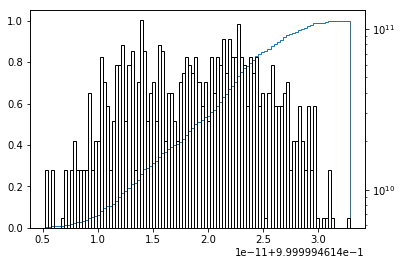

In [19]:
def cumdistplot(vec, ax):
    ax.hist(vec, bins=100, density=True, log=False, cumulative=True, fill=False,histtype='step')
    ax.twinx().hist(vec, bins=100, density=True, log=True, cumulative=False, fill=False,histtype='bar')

cumdistplot(np.std(x_data,axis=0),plt.subplots()[1])

In [ ]:
np.sqrt(np.sum(np.square(eg.predict(X_test) - y_test[:,0])))

In [85]:
joblib.dump(reg, '../../model/dnnreg.pkl') 

['../../model/dnnreg.pkl']

In [ ]:
def save_dnn(reg, filename):
    layer0 = pd.DataFrame(reg.coefs_[0], index=feature_names)
    f = open(filename,"w")
    layer0.to_csv(f,header=False, float_format='%.12f')
    f.close()
    f = open(filename,"a+")
    f.write("\n")
    f.write(" ".join(map(str,reg.intercepts_[0].shape)))
    f.write("\n")
    np.savetxt(f, reg.intercepts_[0].astype('float32'), delimiter=",")
    f.write("\n")
    n_coefs = len(reg.coefs_)
    f.write(str(n_coefs-2))
    f.write("\n")        
    for i in range(1,n_coefs):
        f.write(" ".join(map(str,reg.coefs_[i].shape)))
        f.write("\n")
        np.savetxt(f, reg.coefs_[i].astype('float32'), delimiter=",")
        f.write("\n")
        f.write(" ".join(map(str,reg.intercepts_[i].shape)))
        f.write("\n")
        np.savetxt(f, reg.intercepts_[i].astype('float32'), delimiter=",")
        f.write("\n")
    f.close()

In [15]:
save_dnn(reg, "../../model/dnn_relu.txt")

In [92]:
def dnn_predict(reg, x):
    fmax = np.finfo(x.dtype).max
    act = x
    for i in range(len(reg.coefs_)-1):
        act = np.clip(np.dot(act,reg.coefs_[i]) + reg.intercepts_[i], 0,fmax)
    act = np.dot(act,reg.coefs_[-1]) + reg.intercepts_[-1]
    return act    